# K-Nearest Neighbors Classification
### Isabel De La Cruz

## What is K-Nearest Neighbors Classification

The K-nearest neighbors(KNN) algorithm is a supervised machine leanring algorithm that can be used to solve classification and regression problems. In the case of classification, KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then is selects the K number of points which is closest to the test data. In simple terms KNN can be explained by saying "similar inputs have similar outputs." KNN defines similar inputs as those objects that are close to each other, they have same classes/labels/outputs. 

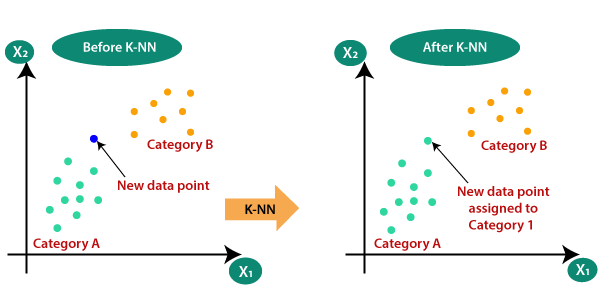

We will now be using the Python programming language to implement the KNN algorithm by using the Iris data set for classification purposes.

We will import the neccessary packages, create a feature set, import data and plot the data being used.

In [31]:
#Importing packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [32]:
#Creating the feature set
feature1 = 'petallength'
feature2 = 'sepalwidth'


In [33]:
#Importing data
iris = pd.read_csv('iris_data.csv')
data = iris[[feature1, feature2, 'class']]
train_data = data.loc[np.arange(0,40)].append(data.loc[np.arange(50,90)],ignore_index=True).append(data.loc[np.arange(100,140)],ignore_index=True)
test_data = data.loc[np.arange(40,50)].append(data.loc[np.arange(90,100)],ignore_index=True).append(data.loc[np.arange(140,150)],ignore_index=True)

x1 = np.array(train_data[train_data['class'] == 'Iris-setosa'][feature1])
y1 = np.array(train_data[train_data['class'] == 'Iris-setosa'][feature2])
x2 = np.array(train_data[train_data['class'] == 'Iris-virginica'][feature1])
y2 = np.array(train_data[train_data['class'] == 'Iris-virginica'][feature2])
x3 = np.array(train_data[train_data['class'] == 'Iris-versicolor'][feature1])
y3 = np.array(train_data[train_data['class'] == 'Iris-versicolor'][feature2])



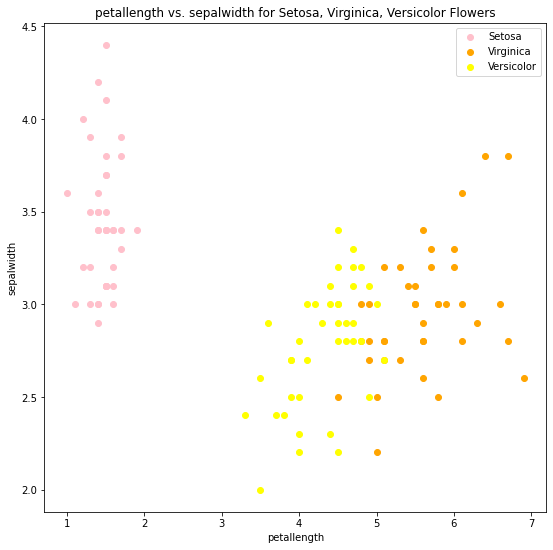

In [49]:
#Plotting the dat being used
plt.figure(figsize=(9,9))
plt.scatter(x1, y1, label="Setosa", color = "pink")
plt.scatter(x2, y2, label="Virginica", color = "orange")
plt.scatter(x3, y3, label="Versicolor", color = "yellow")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Flowers')
plt.legend()

Next, we will need to create three functions:
- Distance function
- All distances function
- KNN function

### Distance Function:
 Calculates the Euclidian distance between two arrays of the same length
 - INPUTS:
     - array1, an array of length n
     - array2, an array of length n
 - OUTPUTS:
     - euc_dist, the Euclidean Distance between array1 and array2

In [35]:
def distance(array1, array2):
  
    n = len(array1)
    total_sum = 0
    for i in range(n):
        total_sum += (array1[i] - array2[i])**2
    return math.sqrt(total_sum)



### All Distances Function:
Calculates the Euclidean Distance between array1 and every row in train_data
- INPUTS:
     - array1, an array of length n
     - train_df, a Pandas DataFrame of size m x n
- OUTPUTS:
     - distances, a list of length m that consists of all the distances between array1 and every row in train_df, respectively.

In [36]:
def all_distances(array1, train_df):

    n = len(array1)
    m = len(train_df.index)
    distances = []
    for i in range(m):
        a1 = array1
        a2 = np.array(train_df[[feature1, feature2]].loc[i])
        distances.append(distance(a1, a2))
    return distances
        


### KNN Function: 
 Calculates the k-nearest neighbors of array1 in train_df and classifies array1
- INPUTS:
     - array1, an array of length n
     - train_df, a Pandas DataFrame of size m x n+1 where each row is a data point and then has its classification
     - k, an int that decides how many neighbors should be checked. Default is 5
      - plot, if True, then array1 will be plotted along with train_df so we can visualize the data. Default is True
- OUTPUTS:
     - classification, the classification of array1
     - the plot of all the data points, if plot == True

In [52]:
def KNN(array1, train_df, k = 5, plot = True):
    
    n = len(array1)
    m = len(train_df)
    
    distances = all_distances(array1, train_df[[feature1, feature2]])
    df_copy = train_df
    df_copy['distances'] = distances
    df_copy = df_copy.sort_values('distances', ascending=True)
    top_k = df_copy.head(k)
    
    vi = np.count_nonzero(np.array(top_k['class']) == 'Iris-virginica')
    ve = np.count_nonzero(np.array(top_k['class']) == 'Iris-versicolor')
    se = np.count_nonzero(np.array(top_k['class']) == 'Iris-setosa')
    temp_dict = {vi:"Iris-virginica", ve:'Iris-versicolor', se:'Iris-setosa'}
    classification = temp_dict[max(temp_dict)]
    
    if plot:
        plt.figure(figsize=(9,9))
        plt.scatter(x1, y1, label="Setosa", zorder=2, color = "pink")
        plt.scatter(x2, y2, label="Virginica", zorder=2, color = "orange")
        plt.scatter(x3, y3, label="Versicolor", zorder=2, color = "yellow")
        plt.scatter(array1[0], array1[1], marker='^', label='Given Point - Classified as ' + classification, 
                    zorder=2, color='red', s=100)
        for i in range(k):
            plt.plot([array1[0], np.array(top_k[[feature1]])[i]], [array1[1], np.array(top_k[[feature2]])[i]], color='black', zorder=1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Flowers')
        plt.legend()
    
    # Data Frame with the closest k points to the test point
    # print(top_k)
    return classification

We will now test the algorithm using a random test point from the test data set. 

'Iris-versicolor'

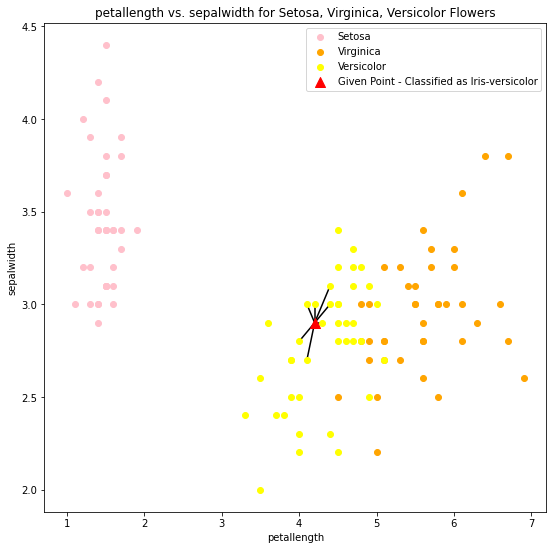

In [53]:
# Random Test Point from the Test Data Set
num = np.random.randint(0,30)
k = 7
KNN(np.array(test_data[[feature1, feature2]].loc[num]), train_data, k=k)

The above plot shows that the KNN algorithm successfully identified the data points within the closest proximity to our random test point from the test data set

Now, we will check to see how successfully the algorithm ran. 

In [42]:
total = len(test_data.index.values)
for i in range(total):
    classification = KNN(np.array(test_data[[feature1, feature2]].loc[i]), train_data, plot=False)
    if classification == test_data['class'].loc[i]:
        total_correct += 1
        
pct_correct = (float(total_correct)/float(total)) * 100
print('K-Nearest Neighbors Algorithm correctly guessed ' + str(round(pct_correct, 2)) + '% of the Test Data Set')

K-Nearest Neighbors Algorithm correctly guessed 500.0% of the Test Data Set


We can can conclude that the KNN algorithm correctly guessed the random test point. 